<a href="https://colab.research.google.com/github/ferehsteh/Comparative-Study/blob/master/Models(task3%2Ctask4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modeling


* Tasks: 
  * Imlementing the following models: 
    * KNN
    * SVM
    * Logistic Regression 
  * Select the best mode

### Initialize required library


In [0]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.metrics import classification_report
import time
import warnings
warnings.filterwarnings('ignore')
# model selectiion
from sklearn.model_selection import StratifiedKFold, cross_val_score

#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#svm
from sklearn import svm
#logestic regression
from sklearn.linear_model import LogisticRegression



### Load data

In [0]:
# Orginal data
df_train = pd.read_csv("./dataset/shuttle.trn", delimiter=' ', header=None)
df_test = pd.read_csv("./dataset/shuttle.tst", delimiter=' ', header=None)

X_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]

### train data with removing outlier and doing oversampling
X_train_ros = pd.read_csv("./Pre-preocess/X_train_ros", delimiter=' ', header=None)
X_train_adasyn = pd.read_csv("./Pre-preocess/X_train_adasyn", delimiter=' ', header=None)
X_train_smt = pd.read_csv("./Pre-preocess/X_train_smt", delimiter=' ', header=None)
y_train_ros = pd.read_csv("./Pre-preocess/y_train_ros", delimiter=' ', header=None)
y_train_smt = pd.read_csv("./Pre-preocess/y_train_smt", delimiter=' ', header=None)
y_train_adasyn = pd.read_csv("./Pre-preocess/y_train_adasyn", delimiter=' ', header=None)

### test data
X_test = pd.read_csv('./Pre-preocess/X_test', delimiter=' ', header=None)
y_test = pd.read_csv('./Pre-preocess/y_test', delimiter=' ', header=None)



### Plot Info

In [0]:
# plot

plt.rcParams.update({'font.size': 22})
fontdict = {'fontsize': 18,
           'weight' : 'bold'}
palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
sns.set()

### Selecting the cross validation partition

In [0]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

### KNN


In [0]:
k_range = range(5,10)
means_smt = []

tic = time.time()
for k in k_range:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X_train_smt, y_train_smt, cv=skf)
    means_smt.append(score.mean())
toc = time.time()
time_cross_knn_smt = toc - tic


In [0]:
k_range = range(5,10)
means_ros = []

tic = time.time()
for k in k_range:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X_train_ros, y_train_ros, cv=skf)
    means_ros.append(score.mean())
toc = time.time()
time_cross_knn_ros = toc - tic

In [0]:
k_range = range(5,10)
means_adasyn = []

tic = time.time()
for k in k_range:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X_train_adasyn, y_train_adasyn, cv=skf)
    means_adasyn.append(score.mean())
toc = time.time()
time_cross_knn_adasyn = toc - tic

<function matplotlib.pyplot.show>

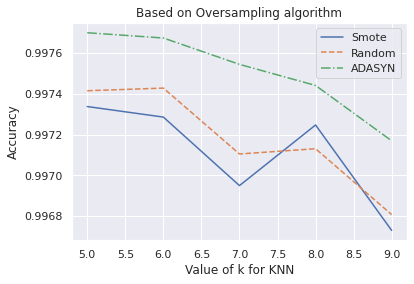

In [0]:
plt.plot(k_range, means_smt, linestyle='solid', label = "Smote")
plt.plot(k_range, means_ros, linestyle='dashed', label = "Random")
plt.plot(k_range, means_adasyn, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show



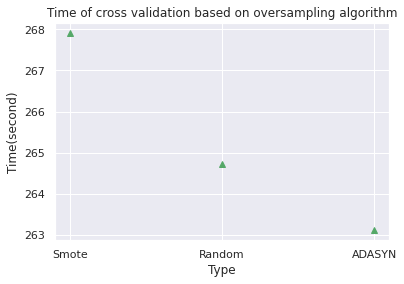

[267.9154224395752, 264.72564721107483, 263.1106343269348]


In [0]:
times = [time_cross_knn_smt, time_cross_knn_ros, time_cross_knn_adasyn]
names = ['Smote', 'Random', 'ADASYN']
plt.plot(names, times, 'g^')
plt.xlabel('Type')
plt.ylabel('Time(second)')
plt.title('Time of cross validation based on oversampling algorithm')
plt.grid(True)
plt.show()
print(times)





*   for k = 5: I got the best value for adasyn
*   for k = 5: I got the best value for smt
*   for k = 5: I got the best value for ros


### SVM

In [0]:

C_range = [100, 1]
gamma_range = [0.01]
means_svm_rbf_smt = []

tic = time.time()
for C in C_range:
    for gamma in gamma_range:
        print(C,gamma)
        svm_model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        score = cross_val_score(svm_model,X_train_smt, y_train_smt, cv=skf)
        means_svm_rbf_smt.append(score.mean())
toc = time.time()
time_cross_svm_rbf_smt = toc-tic


100 0.01
1 0.01


In [0]:
C_range = [100, 1]
gamma_range = [0.01]
means_svm_rbf_ros = []

tic = time.time()
for C in C_range:
    for gamma in gamma_range:
        svm_model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        score = cross_val_score(svm_model,X_train_ros, y_train_ros, cv=skf)
        means_svm_rbf_ros.append(score.mean())
toc = time.time()
time_cross_svm_rbf_ros = toc-tic

In [0]:
C_range = [100, 1]
gamma_range = [0.01]
means_svm_rbf_adasyn = []

tic = time.time()
for C in C_range:
    for gamma in gamma_range:
        svm_model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        score = cross_val_score(svm_model,X_train_adasyn, y_train_adasyn, cv=skf)
        means_svm_rbf_adasyn.append(score.mean())
toc = time.time()
time_cross_svm_rbf_adasyn = toc-tic

In [0]:
C_range = [1,3,7]
means_linear_smt = []

tic = time.time()
for C in C_range:
        svm_model = svm.SVC(C=C, kernel='linear')
        score = cross_val_score(svm_model, X_train_smt, y_train_smt, cv=skf)
        means_linear_smt.append(score.mean())
toc = time.time()
time_cross_svm_smt = toc-tic

In [0]:
C_range = [1,3,7]
means_linear_ros = []

tic = time.time()
for C in C_range:
        svm_model = svm.SVC(C=C, kernel='linear')
        score = cross_val_score(svm_model, X_train_ros, y_train_ros, cv=skf)
        means_linear_ros.append(score.mean())
toc = time.time()
time_cross_svm_ros = toc-tic

In [0]:
C_range = [1,3,7]
means_linear_adasyn = []

tic = time.time()
for C in C_range:
        svm_model = svm.SVC(C=C, kernel='linear')
        score = cross_val_score(svm_model, X_train_adasyn, y_train_adasyn, cv=skf)
        means_linear_adasyn.append(score.mean())
toc = time.time()
time_cross_svm_adasyn = toc-tic

<function matplotlib.pyplot.show>

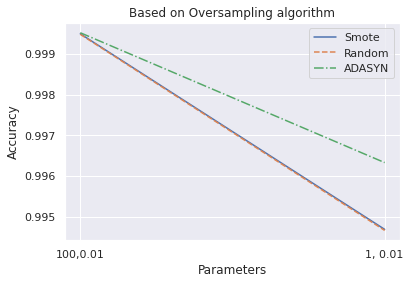

In [0]:
names = ["100,0.01", "1, 0.01"]
plt.plot(names, means_svm_rbf_smt, linestyle='solid', label = "Smote")
plt.plot(names, means_svm_rbf_ros, linestyle='dashed', label = "Random")
plt.plot(names, means_svm_rbf_adasyn, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

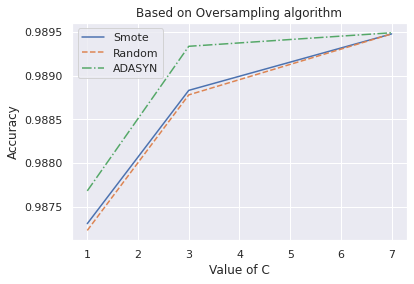

In [0]:
plt.plot(C_range, means_linear_smt, linestyle='solid', label = "Smote")
plt.plot(C_range, means_linear_ros, linestyle='dashed', label = "Random")
plt.plot(C_range, means_linear_adasyn, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()
plt.show

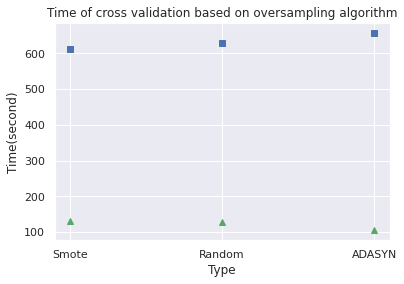

[131.24879789352417, 129.66145706176758, 104.8572506904602]


In [0]:
times = [time_cross_svm_rbf_smt, time_cross_svm_rbf_ros, time_cross_svm_rbf_adasyn]
times_linear = [time_cross_svm_smt, time_cross_svm_ros, time_cross_svm_adasyn]
names = ['Smote', 'Random', 'ADASYN']
plt.plot(names, times, 'g^')
plt.plot(names, times_linear, 'bs')
plt.xlabel('Type')
plt.ylabel('Time(second)')
plt.title('Time of cross validation based on oversampling algorithm')
plt.grid(True)
plt.show()
print(times)


### Logestic Regression

In [0]:
c_range = range(5,10)
means_smt_liblinear_ovr = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='ovr')
    score = cross_val_score(lr, X_train_smt, y_train_smt, cv=skf)
    means_smt_liblinear_ovr.append(score.mean())
toc = time.time()
time_cross_means_smt_liblinear_ovr = toc-tic    

In [0]:
c_range = range(5,10)
means_ros_liblinear_ovr = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='ovr')
    score = cross_val_score(lr, X_train_ros, y_train_ros, cv=skf)
    means_ros_liblinear_ovr.append(score.mean())
toc = time.time()
time_cross_means_ros_liblinear_ovr = toc-tic    

In [0]:
c_range = range(5,10)
means_adasyn_liblinear_ovr = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='ovr')
    score = cross_val_score(lr, X_train_adasyn, y_train_adasyn, cv=skf)
    means_adasyn_liblinear_ovr.append(score.mean())
toc = time.time()
time_cross_means_adasyn_liblinear_ovr = toc-tic 

In [0]:
c_range = range(5,10)
means_smt_newton_cg_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='newton-cg', multi_class='multinomial')
    score = cross_val_score(lr, X_train_smt, y_train_smt, cv=skf)
    means_smt_newton_cg_multinomial.append(score.mean())
toc = time.time()
time_cross_means_smt_newton_cg_multinomial = toc-tic   

In [0]:
c_range = range(5,10)
means_ros_newton_cg_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='newton-cg', multi_class='multinomial')
    score = cross_val_score(lr, X_train_ros, y_train_ros, cv=skf)
    means_ros_newton_cg_multinomial.append(score.mean())
toc = time.time()
time_cross_means_ros_newton_cg_multinomial = toc-tic 

In [0]:
c_range = range(5,10)
means_adasyn_newton_cg_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='newton-cg', multi_class='multinomial')
    score = cross_val_score(lr, X_train_adasyn, y_train_adasyn, cv=skf)
    means_adasyn_newton_cg_multinomial.append(score.mean())
toc = time.time()
time_cross_means_adasyn_newton_cg_multinomial = toc-tic 

<function matplotlib.pyplot.show>

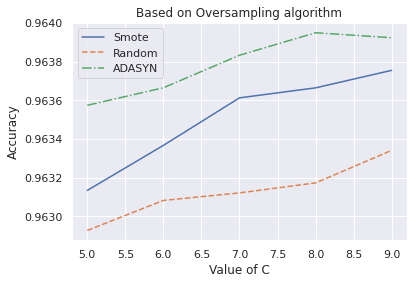

In [0]:
plt.plot(c_range, means_smt_liblinear_ovr, linestyle='solid', label = "Smote")
plt.plot(c_range, means_ros_liblinear_ovr, linestyle='dashed', label = "Random")
plt.plot(c_range, means_adasyn_liblinear_ovr, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

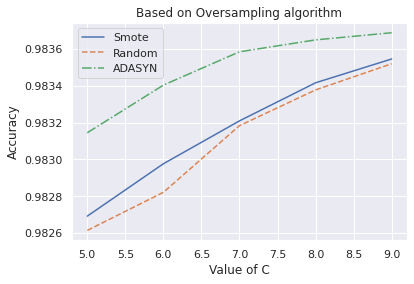

In [0]:
plt.plot(c_range, means_smt_newton_cg_multinomial, linestyle='solid', label = "Smote")
plt.plot(c_range, means_ros_newton_cg_multinomial, linestyle='dashed', label = "Random")
plt.plot(c_range, means_adasyn_newton_cg_multinomial, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()
plt.show

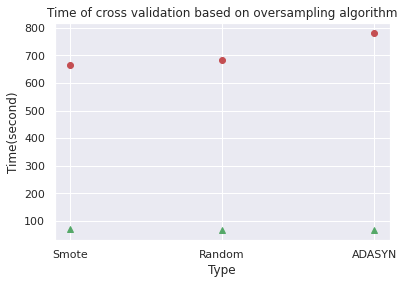

[131.24879789352417, 129.66145706176758, 104.8572506904602]


In [0]:
times_liblinear_ovr = [time_cross_means_smt_liblinear_ovr, time_cross_means_ros_liblinear_ovr, time_cross_means_adasyn_liblinear_ovr]
times_newton_cg_multinomial = [time_cross_means_smt_newton_cg_multinomial, time_cross_means_ros_newton_cg_multinomial, time_cross_means_adasyn_newton_cg_multinomial]
names = ['Smote', 'Random', 'ADASYN']
plt.plot(names, times_liblinear_ovr, 'g^')
plt.plot(names, times_newton_cg_multinomial, 'ro')
plt.xlabel('Type')
plt.ylabel('Time(second)')
plt.title('Time of cross validation based on oversampling algorithm')
plt.grid(True)
plt.show()
print(times)

### Result of the algorithms in the test base

In [0]:
#------------------train------------------------------
# best params----KNN
tic = time.time()
knn = KNeighborsClassifier(5)
# fit
knn.fit(X_train_adasyn, y_train_adasyn)
toc = time.time()
time_train_knn = toc - tic

# best params----SVM
tic = time.time()
svm_model = svm.SVC(gamma=0.01, kernel='rbf', C=100)
# fit
svm_model.fit(X_train_adasyn, y_train_adasyn)
toc = time.time()
time_train_svm = toc - tic

# best params----LR
tic = time.time()
lr = LogisticRegression(C=8, random_state=0, solver='newton-cg', multi_class='multinomial')
# fit
lr.fit(X_train_adasyn, y_train_adasyn)
toc = time.time()
time_train_lr = toc - tic

#------------------test---------------------------
#knn
tic = time.time()
knn_pred = knn.predict(X_test)
toc = time.time()
time_test_knn = toc - tic

#svm
tic = time.time()
svm_pred = svm_model.predict(X_test)
toc = time.time()
time_test_svm = toc - tic

#lr
tic = time.time()
lr_pred = lr.predict(X_test)
toc = time.time()
time_test_lr = toc - tic


In [0]:
#--------------------comparing time------------------------
times = {'knn': [], 'svm': [], 'lr': []}
times['knn'].append(time_train_knn)
times['knn'].append(time_test_knn)
times['svm'].append(time_train_svm)
times['svm'].append(time_test_svm)
times['lr'].append(time_train_lr)
times['lr'].append(time_test_lr)
bp = pd.DataFrame([times['knn'], times['svm'], times['lr']]).T
bp = bp.rename({0: 'KNN', 1: 'SVM', 2: 'LR'}, axis=1)
bp = bp.rename({0: 'Train', 1: 'Test'}, axis=0)
bp

,KNN,SVM,LR
Train,5.648078,2.391984,15.378455
Test,5.041261,0.420657,0.002341


In [0]:
print("KNN Classification: ")
print(classification_report(knn_pred, y_test))

print("SVM Classification: ")
print(classification_report(svm_pred, y_test))

print("LR Classification: ")
print(classification_report(lr_pred, y_test))

KNN Classification: 
              precision    recall  f1-score   support

           1       1.00      0.79      0.88     14485
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.79     14500
   macro avg       0.14      0.11      0.13     14500
weighted avg       1.00      0.79      0.88     14500

SVM Classification: 
              precision    recall  f1-score   support

           1       1.00      0.79      0.88     14493
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00   